## Cilj ovog projekta je definirati različite arhitekture neuronskih mreža i za svaku arhitekturu primijeniti nekoliko metoda regularizacije i vidjeti kako one utječu na točnost modela.

In [37]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Koristit ćemo Fashion MNIST dataset. Učitajmo podatke.

In [38]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [39]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Skalirajmo podatke radi lakšeg učenja mreže.

In [40]:
X_train = X_train / 255.0

X_test = X_test / 255.0

In [41]:
BR_EPOHA = 10
BATCH_SIZE = 64

Nacrtajmo prvih 25 slika iz skupa za treniranje.

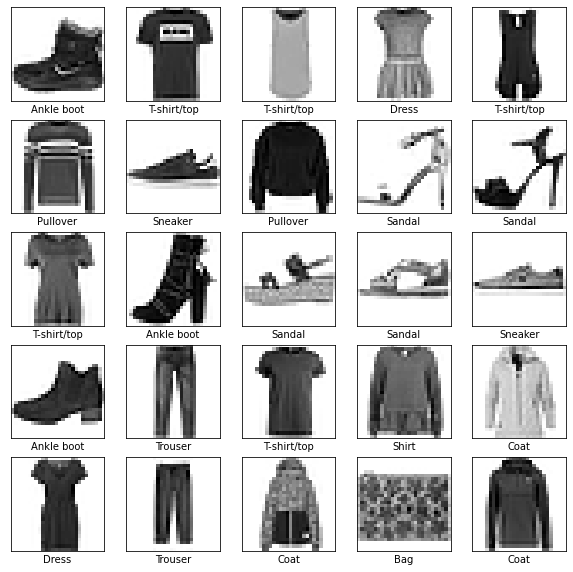

In [42]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Sada učitavamo potrebne module za izgradnju neuronskih mreža i gradimo osnovni model koji će nam poslužiti za usporedbu za modele na koje je primijenjena određena metoda regularizacije. Osnovni model je konvolucijska neuronska mreža s AveragePool slojevima.

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, Flatten, Dense

In [44]:
def osnovni_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(AvgPool2D((2,2)))

  model.add(Conv2D(64, (3, 3), activation='tanh', padding='same',))
  model.add(Conv2D(64, (3, 3), activation='tanh', padding='same',))
  model.add(AvgPool2D((2,2)))

  model.add(Conv2D(128, (3, 3), activation='tanh', padding='same',))
  model.add(Conv2D(128, (3, 3), activation='tanh', padding='same',))
  model.add(AvgPool2D((2,2)))

  model.add(Conv2D(128, (3, 3), activation='relu', padding='same',))
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same',))
  model.add(AvgPool2D((2,2)))

  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

Koristimo metodu sa vježbi za crtanje krivulja točnosti i gubitka na skupovima za treniranje i validaciju.

In [45]:
def plot_history(hist_baseline, hist_regularized = None):
   
    fig = plt.figure(figsize = (17,5))
    metrics = ["loss", "accuracy"]
    
    for i in range(len(metrics)):
        metric = metrics[i]
        plt.subplot(1, 2, i+1)
        plt.title(metric.capitalize())
        plt.xlabel("epoha")
        plt.ylabel(metric)
        br_epoha = len(hist_baseline.history[metric])
        plt.plot(range(1, br_epoha + 1), hist_baseline.history[metric], 
                 label="train", color = "tab:blue")
        plt.plot(range(1, br_epoha + 1), hist_baseline.history["val_" + metric], 
                 label="val", color = "tab:orange")

        if hist_regularized:
            br_epoha = len(hist_regularized.history[metric])
            plt.plot(range(1, br_epoha + 1), hist_regularized.history[metric], 
                 label="regularized train", color = "tab:blue", linestyle = '--')
            plt.plot(range(1, br_epoha + 1), hist_regularized.history["val_" + metric], 
                 label="regularized val", color = "tab:orange", linestyle = '--')
        plt.legend()

Mala pomoćna metoda za ispis točnosti pojedinog modela.

In [48]:
def print_acc(model):
  _, acc = model.evaluate(X_test, y_test, verbose = 0)
  print('Accuracy (test data): {:.2f} %'.format(acc*100))

In [49]:
def accuracy_model(model):
  _, acc = model.evaluate(X_test, y_test, verbose = 0)
  return acc

Definiramo osnovni model konvolucijske neuronske mreže i treniramo ga.

In [50]:
model_base_cnn = osnovni_model()
baseline_hist = model_base_cnn.fit(X_train, y_train, epochs=BR_EPOHA, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 6s 8ms/step - loss: 0.5826 - accuracy: 0.7807 - val_loss: 0.4023 - val_accuracy: 0.8493
Epoch 2/10
750/750 [==============================] - 5s 7ms/step - loss: 0.3558 - accuracy: 0.8670 - val_loss: 0.3415 - val_accuracy: 0.8739
Epoch 3/10
750/750 [==============================] - 6s 7ms/step - loss: 0.3031 - accuracy: 0.8867 - val_loss: 0.2881 - val_accuracy: 0.8898
Epoch 4/10
750/750 [==============================] - 6s 7ms/step - loss: 0.2718 - accuracy: 0.8984 - val_loss: 0.2706 - val_accuracy: 0.9010
Epoch 5/10
750/750 [==============================] - 6s 7ms/step - loss: 0.2452 - accuracy: 0.9089 - val_loss: 0.2582 - val_accuracy: 0.9047
Epoch 6/10
750/750 [==============================] - 6s 7ms/step - loss: 0.2283 - accuracy: 0.9150 - val_loss: 0.2570 - val_accuracy: 0.9078
Epoch 7/10
750/750 [==============================] - 6s 7ms/step - loss: 0.2112 - accuracy: 0.9218 - val_loss: 0.2404 - val_accuracy: 0.9103
Epoch 

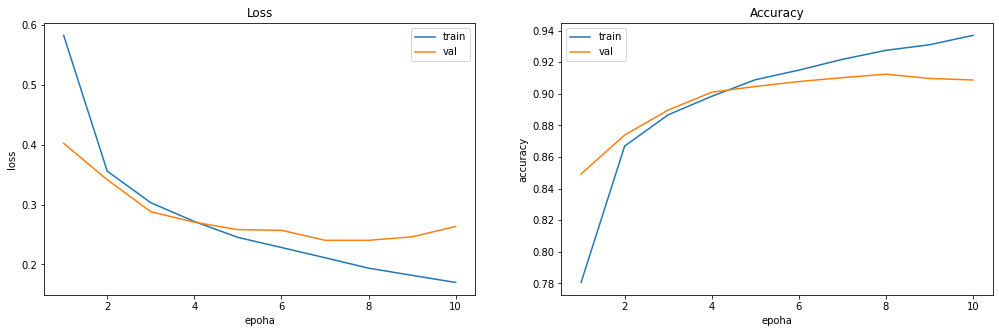

In [51]:
plot_history(baseline_hist)

In [52]:
print_acc(model_base_cnn)

Accuracy (test data): 90.54 %


Sada ćemo primijeniti razne metode regularizacije na osnovnom modelu. Metode regularizacije se koriste kako bi smanjili složenost modela, tj. njegov overfitting na dani dataset. 

Overfitting je događaj kada se model koji gradimo previše prilagodi podacima na kojima radi i nije sposoban "donijeti zaključke" (generalizirati) na novim, dotad neviđenim podacima. Problem overfittinga može se riješiti na više načina: primjerice, smanjenjem broja featuresa (karakteristika) skupa podataka ili povećanjem broja primjera u skupu podataka kako bi imali više podataka nego karakteristika tih podataka.

# $L_2$ regularizacija

$L_2$ regularizacija (koristi se naziv i "ridge regression") jedna je od najčešće korištenih metoda regularizacije. Osnovnoj funkciji greške dodaje se regularizacijski član pa se minimizira sljedeća funkcija:

$$\tilde{J}(\boldsymbol{w}) = J(\boldsymbol{w}) + \frac{\lambda}{2}\sum\limits_i w_i^2.$$

Treba biti oprezan prilikom izbora parametra $\lambda$. Prevelik $\lambda$ može previše doprinijeti funkciji gubitka te prilikom toga može doći do underfittinga (premalog prilagođavanja datasetu). 

Uočimo da u gornjoj formuli imamo kvadrate pogrešaka pa time penaliziramo one težine s velikom apsolutnom greškom. Stoga, ova metoda nije "otporna" na outliere (vrijednosti koje značajno odstupaju od većine podataka u datasetu) za razliku od $L_1$ regularizacije koja u svojoj formuli umjesto kvadrata pogrešaka ima apsolutne vrijednosti pogrešaka.

$L_2$ regularizacija daje najbolje rezultate kada su težine približno jednake (primjerice, sve težine su iz segmenta $[0,1]$).

Učitavamo potrebne module, definiramo 6 različitih parametara regularizacije.

In [53]:
from tensorflow.keras.regularizers import l2

lambda_l2_1 = 0.00005
lambda_l2_2 = 0.0001
lambda_l2_3 = 0.00015
lambda_l2_4 = 0.0002
lambda_l2_5 = 0.00025
lambda_l2_6 = 0.0003

lambde=[lambda_l2_1,lambda_l2_2,lambda_l2_3,lambda_l2_4,lambda_l2_5, lambda_l2_6]

Definiramo metodu koja nam vraća model na koji je primijenjena metoda $L_2$ regularizacije sa parametrom regularizacije l.

In [54]:
def model_l2_reg(l):
  model_l2= Sequential()
  model_l2.add(Conv2D(32, kernel_size = (3,3), input_shape = (28,28,1), activation='relu', 
                    kernel_regularizer=l2(l))) 
  model_l2.add(Conv2D(32, kernel_size = (3,3), activation='relu',
                    kernel_regularizer=l2(l))) 
  model_l2.add(AvgPool2D(pool_size=(2, 2)))
  model_l2.add(Conv2D(64, kernel_size = (3,3), input_shape = (28,28,1), activation='relu',
                    kernel_regularizer=l2(l))) 
  model_l2.add(Conv2D(64, kernel_size = (3,3), activation='relu',
                    kernel_regularizer=l2(l))) 
  model_l2.add(AvgPool2D(pool_size=(2, 2)))
  model_l2.add(Flatten())
  model_l2.add(Dense(128, activation = 'relu',
                   kernel_regularizer=l2(l)))
  model_l2.add(Dense(32, activation = 'relu',
                   kernel_regularizer=l2(l)))
  model_l2.add(Dense(10, activation='softmax'))
  model_l2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model_l2

Definiramo 6 modela i treniramo ih.

In [55]:
model_l2_1=model_l2_reg(lambda_l2_1)
model_l2_2=model_l2_reg(lambda_l2_2)
model_l2_3=model_l2_reg(lambda_l2_3)
model_l2_4=model_l2_reg(lambda_l2_4)
model_l2_5=model_l2_reg(lambda_l2_5)
model_l2_6=model_l2_reg(lambda_l2_6)

In [56]:
l2_1_hist=model_l2_1.fit(X_train, y_train, epochs=BR_EPOHA, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 5s 6ms/step - loss: 0.6177 - accuracy: 0.7776 - val_loss: 0.4560 - val_accuracy: 0.8403
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4043 - accuracy: 0.8594 - val_loss: 0.3986 - val_accuracy: 0.8603
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3480 - accuracy: 0.8791 - val_loss: 0.3359 - val_accuracy: 0.8839
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3106 - accuracy: 0.8946 - val_loss: 0.3148 - val_accuracy: 0.8945
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2854 - accuracy: 0.9042 - val_loss: 0.3035 - val_accuracy: 0.8990
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2652 - accuracy: 0.9132 - val_loss: 0.3068 - val_accuracy: 0.9004
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2491 - accuracy: 0.9207 - val_loss: 0.2793 - val_accuracy: 0.9083
Epoch 

In [57]:
l2_2_hist=model_l2_2.fit(X_train, y_train, epochs=BR_EPOHA, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 5s 5ms/step - loss: 0.6896 - accuracy: 0.7573 - val_loss: 0.4702 - val_accuracy: 0.8421
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4285 - accuracy: 0.8576 - val_loss: 0.4932 - val_accuracy: 0.8257
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3708 - accuracy: 0.8787 - val_loss: 0.3524 - val_accuracy: 0.8858
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3378 - accuracy: 0.8899 - val_loss: 0.3395 - val_accuracy: 0.8898
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3148 - accuracy: 0.9002 - val_loss: 0.3169 - val_accuracy: 0.8989
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2968 - accuracy: 0.9086 - val_loss: 0.3211 - val_accuracy: 0.9027
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2843 - accuracy: 0.9134 - val_loss: 0.3316 - val_accuracy: 0.8972
Epoch 

In [58]:
l2_3_hist=model_l2_3.fit(X_train, y_train, epochs=BR_EPOHA, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 5s 6ms/step - loss: 0.6733 - accuracy: 0.7636 - val_loss: 0.4736 - val_accuracy: 0.8407
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4392 - accuracy: 0.8568 - val_loss: 0.3956 - val_accuracy: 0.8736
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3802 - accuracy: 0.8774 - val_loss: 0.3664 - val_accuracy: 0.8850
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3480 - accuracy: 0.8915 - val_loss: 0.3487 - val_accuracy: 0.8938
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3274 - accuracy: 0.8992 - val_loss: 0.3326 - val_accuracy: 0.8989
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3093 - accuracy: 0.9083 - val_loss: 0.3182 - val_accuracy: 0.9039
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2975 - accuracy: 0.9125 - val_loss: 0.3148 - val_accuracy: 0.9064
Epoch 

In [59]:
l2_4_hist=model_l2_4.fit(X_train, y_train, epochs=BR_EPOHA, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 5s 6ms/step - loss: 0.6741 - accuracy: 0.7714 - val_loss: 0.4936 - val_accuracy: 0.8409
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4538 - accuracy: 0.8572 - val_loss: 0.4357 - val_accuracy: 0.8632
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4004 - accuracy: 0.8763 - val_loss: 0.3928 - val_accuracy: 0.8822
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3657 - accuracy: 0.8899 - val_loss: 0.3752 - val_accuracy: 0.8873
Epoch 5/10
750/750 [==============================] - 4s 6ms/step - loss: 0.3416 - accuracy: 0.8990 - val_loss: 0.3524 - val_accuracy: 0.8952
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3240 - accuracy: 0.9067 - val_loss: 0.3278 - val_accuracy: 0.9047
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3111 - accuracy: 0.9117 - val_loss: 0.3331 - val_accuracy: 0.9035
Epoch 

In [60]:
l2_5_hist=model_l2_5.fit(X_train, y_train, epochs=BR_EPOHA, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 5s 6ms/step - loss: 0.6813 - accuracy: 0.7700 - val_loss: 0.5467 - val_accuracy: 0.8267
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4659 - accuracy: 0.8566 - val_loss: 0.4272 - val_accuracy: 0.8712
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4081 - accuracy: 0.8765 - val_loss: 0.4258 - val_accuracy: 0.8785
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3735 - accuracy: 0.8908 - val_loss: 0.3759 - val_accuracy: 0.8911
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3518 - accuracy: 0.8977 - val_loss: 0.3543 - val_accuracy: 0.8992
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3374 - accuracy: 0.9040 - val_loss: 0.3541 - val_accuracy: 0.9000
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3223 - accuracy: 0.9094 - val_loss: 0.3453 - val_accuracy: 0.9021
Epoch 

In [61]:
l2_6_hist=model_l2_6.fit(X_train, y_train, epochs=BR_EPOHA, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 5s 5ms/step - loss: 0.6849 - accuracy: 0.7738 - val_loss: 0.5175 - val_accuracy: 0.8375
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4784 - accuracy: 0.8520 - val_loss: 0.4430 - val_accuracy: 0.8682
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4197 - accuracy: 0.8746 - val_loss: 0.4194 - val_accuracy: 0.8687
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3897 - accuracy: 0.8850 - val_loss: 0.4235 - val_accuracy: 0.8704
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3674 - accuracy: 0.8931 - val_loss: 0.3779 - val_accuracy: 0.8911
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3485 - accuracy: 0.8985 - val_loss: 0.3720 - val_accuracy: 0.8920
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3380 - accuracy: 0.9047 - val_loss: 0.3478 - val_accuracy: 0.9020
Epoch 

Crtamo krivulje točnosti i gubitka početnog model i onog na kojem je primijenjena metoda $L_2$ regularizacije. Imamo dva takva modela-

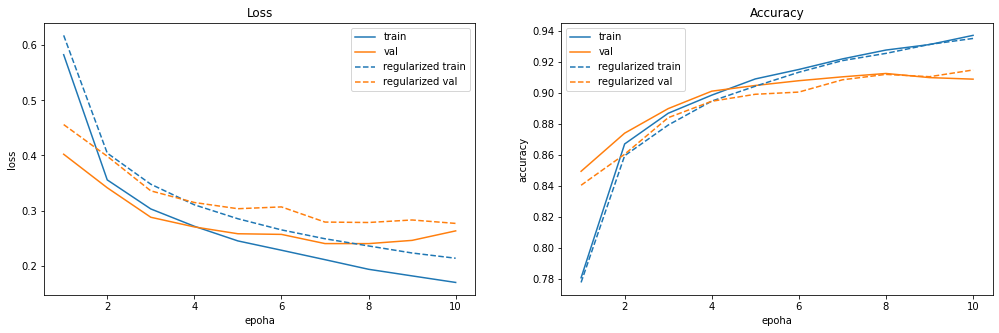

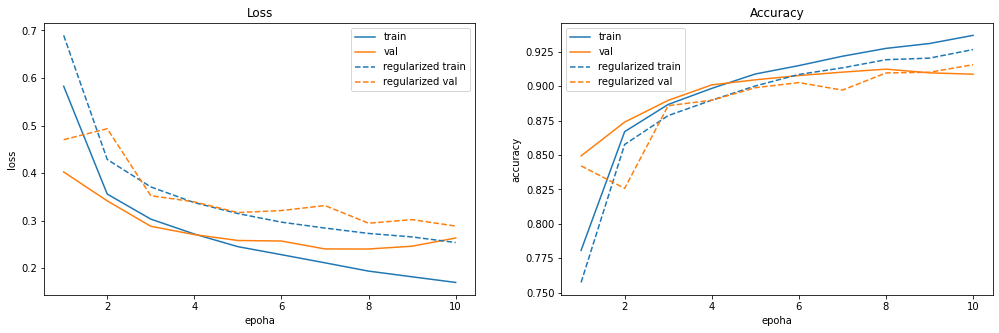

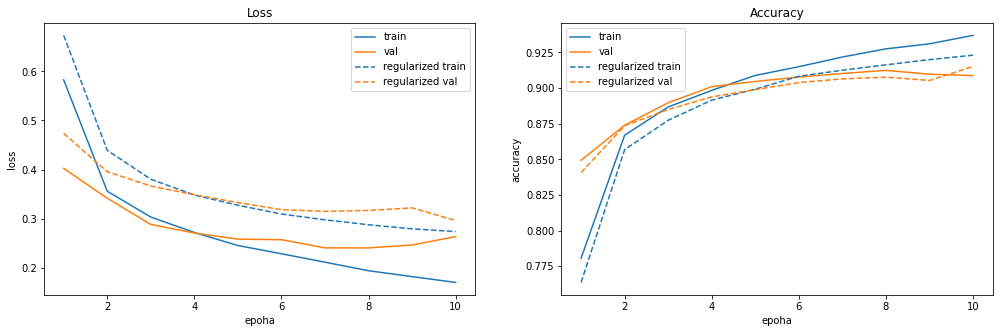

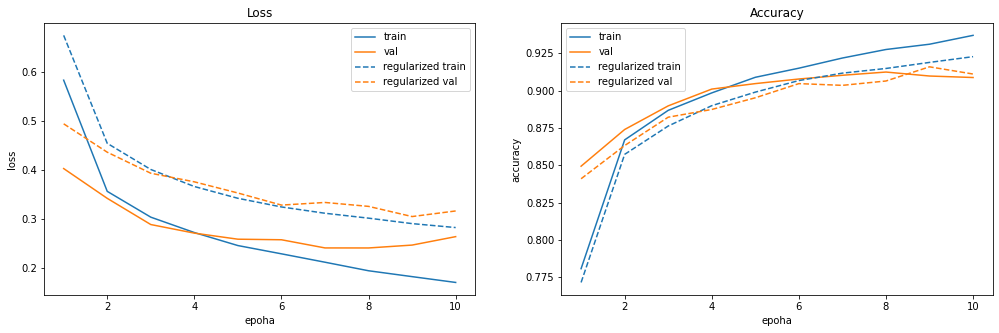

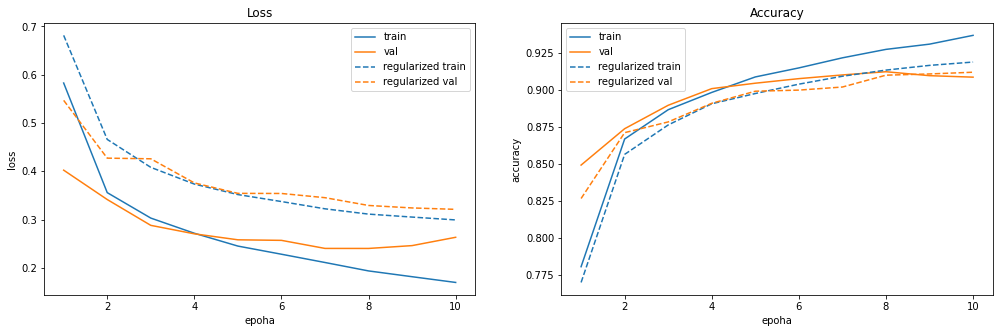

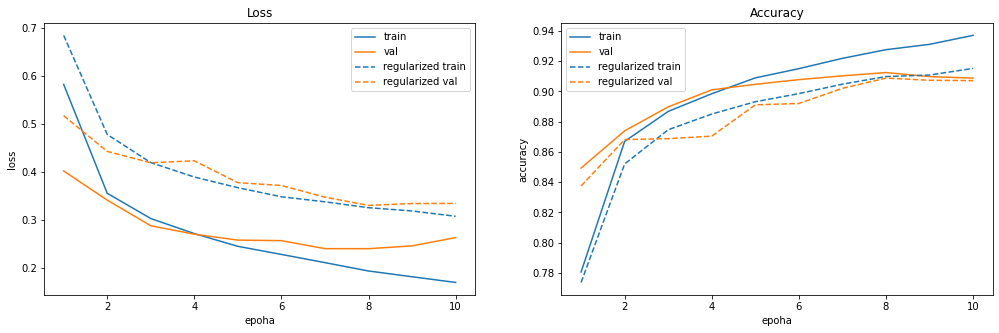

In [62]:
plot_history(baseline_hist, l2_1_hist)
plot_history(baseline_hist, l2_2_hist)
plot_history(baseline_hist, l2_3_hist)
plot_history(baseline_hist, l2_4_hist)
plot_history(baseline_hist, l2_5_hist)
plot_history(baseline_hist, l2_6_hist)

In [63]:
print_acc(model_l2_1)
print_acc(model_l2_2)
print_acc(model_l2_3)
print_acc(model_l2_4)
print_acc(model_l2_5)
print_acc(model_l2_6)

Accuracy (test data): 91.39 %
Accuracy (test data): 91.22 %
Accuracy (test data): 91.16 %
Accuracy (test data): 90.92 %
Accuracy (test data): 90.65 %
Accuracy (test data): 90.54 %


In [64]:
tocnosti_l2=[0]*6
tocnosti_l2[0]=accuracy_model(model_l2_1)*100
tocnosti_l2[1]=accuracy_model(model_l2_2)*100
tocnosti_l2[2]=accuracy_model(model_l2_3)*100
tocnosti_l2[3]=accuracy_model(model_l2_4)*100
tocnosti_l2[4]=accuracy_model(model_l2_5)*100
tocnosti_l2[5]=accuracy_model(model_l2_6)*100
print(tocnosti_l2)

[91.39000177383423, 91.21999740600586, 91.15999937057495, 90.92000126838684, 90.6499981880188, 90.53999781608582]


Sljedeći graf prikazuje kako promjena (porast) parametra regularizacije utječe na točnost modela.

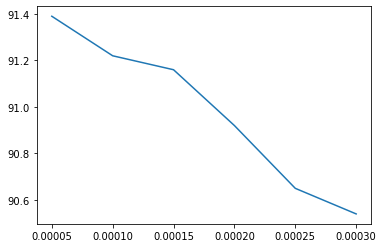

In [65]:
plt.plot(lambde, tocnosti_l2)

Zaklučak: iz grafova vidimo da smo regularizacijom za neke vrijednosti parametra dobili manju, a za neke vrijednosti veću točnost modela. Najveća točnost se postiže za parametar l=0.00015.

# Dropout

Ideja metode dropouta je ispustiti ili zanemariti određene neurone u sloju te neurone s kojima je taj neuron povezan s unaprijed zadanom vjerojatnošću. Ovime se prekida adaptacija mreže na pogreške iz prethodnih slojeva. 

Ova se metoda može primijeniti na potpuno povezane slojeve (fully connected, FC), na konvolucijske slojeve i na rekurentne slojeve. Ova se metoda može koristiti zajedno s ostalim metodama regularizacije.

Kako bismo vidjeli koji drop rate je najbolji, definirat ćemo ih nekoliko i vidjeti koji daje najbolje rezultate.

Ispuštanjem određenih neurona dobivamo, na neki način, različite arhitekture mreže. Ovo smo mogli dobiti i jednostavno trenirajući različite arhitekture na istom skupu podataka, ali to bi zahtijevalo previše resursa (kako računalnih, tako i vremenskih).

Kako se za vrijeme treniranja ispuštaju neuroni, onim neuronima koji ostanu u treniranju povećavaju se težine kako bi se nadomjestile težine koje su ispuštene.

Nedostatak ove metode regularizacije je što treniranje mreža na kojima je primijenjen dropout traje i do nekoliko puta duže u odnosu na obične mreže.


Učitavamo potrebne module i definiramo 6 različitih drop ratea.

In [66]:
from tensorflow.keras.layers import Dropout

In [67]:
drop_rate_1=0.15
drop_rate_2=0.2
drop_rate_3=0.25
drop_rate_4=0.3
drop_rate_5=0.35
drop_rate_6=0.4

stope=[drop_rate_1, drop_rate_2, drop_rate_3, drop_rate_4, drop_rate_5, drop_rate_6]

Definiramo metodu koja nam vraća model na kojem je primijenjena metoda dropouta

In [68]:
def model_drop_(drop_rate):
  model_drop = Sequential()
  model_drop.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
  model_drop.add(Dropout(drop_rate))
  model_drop.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model_drop.add(Dropout(drop_rate))
  model_drop.add(AvgPool2D((2,2)))

  model_drop.add(Conv2D(64, (3, 3), activation='relu', padding='same',))
  model_drop.add(Dropout(drop_rate))
  model_drop.add(Conv2D(64, (3, 3), activation='relu', padding='same',))
  model_drop.add(Dropout(drop_rate))
  model_drop.add(AvgPool2D((2,2)))

  model_drop.add(Conv2D(128, (3, 3), activation='relu', padding='same',))
  model_drop.add(Dropout(drop_rate))
  model_drop.add(Conv2D(128, (3, 3), activation='relu', padding='same',))
  model_drop.add(Dropout(drop_rate))
  model_drop.add(AvgPool2D((2,2)))

  model_drop.add(Flatten())
  model_drop.add(Dense(128, activation='relu'))
  model_drop.add(Dropout(drop_rate))
  model_drop.add(Dense(10, activation='softmax'))

  model_drop.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return model_drop

Definiramo modele i treniramo ih.

In [69]:
model_drop_1=model_drop_(drop_rate_1)
model_drop_2=model_drop_(drop_rate_2)
model_drop_3=model_drop_(drop_rate_3)
model_drop_4=model_drop_(drop_rate_4)
model_drop_5=model_drop_(drop_rate_5)
model_drop_6=model_drop_(drop_rate_6)

In [70]:
drop_1_hist=model_drop_1.fit(X_train, y_train, epochs=BR_EPOHA, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 7s 9ms/step - loss: 0.6136 - accuracy: 0.7719 - val_loss: 0.3908 - val_accuracy: 0.8505
Epoch 2/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3631 - accuracy: 0.8654 - val_loss: 0.3164 - val_accuracy: 0.8820
Epoch 3/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3124 - accuracy: 0.8830 - val_loss: 0.2875 - val_accuracy: 0.8951
Epoch 4/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2804 - accuracy: 0.8957 - val_loss: 0.2599 - val_accuracy: 0.9063
Epoch 5/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2522 - accuracy: 0.9060 - val_loss: 0.2510 - val_accuracy: 0.9058
Epoch 6/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2350 - accuracy: 0.9122 - val_loss: 0.2265 - val_accuracy: 0.9152
Epoch 7/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2150 - accuracy: 0.9205 - val_loss: 0.2242 - val_accuracy: 0.9157
Epoch 

In [71]:
drop_2_hist=model_drop_2.fit(X_train, y_train, epochs=BR_EPOHA, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 7s 9ms/step - loss: 0.6521 - accuracy: 0.7568 - val_loss: 0.3947 - val_accuracy: 0.8553
Epoch 2/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3914 - accuracy: 0.8546 - val_loss: 0.3229 - val_accuracy: 0.8737
Epoch 3/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3323 - accuracy: 0.8767 - val_loss: 0.2868 - val_accuracy: 0.8928
Epoch 4/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3026 - accuracy: 0.8863 - val_loss: 0.2615 - val_accuracy: 0.9038
Epoch 5/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2719 - accuracy: 0.8984 - val_loss: 0.2509 - val_accuracy: 0.9068
Epoch 6/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2542 - accuracy: 0.9069 - val_loss: 0.2628 - val_accuracy: 0.9028
Epoch 7/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2347 - accuracy: 0.9136 - val_loss: 0.2359 - val_accuracy: 0.9112
Epoch 

In [72]:
drop_3_hist=model_drop_3.fit(X_train, y_train, epochs=BR_EPOHA, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 7s 9ms/step - loss: 0.6500 - accuracy: 0.7591 - val_loss: 0.4506 - val_accuracy: 0.8250
Epoch 2/10
750/750 [==============================] - 6s 9ms/step - loss: 0.4037 - accuracy: 0.8529 - val_loss: 0.3304 - val_accuracy: 0.8779
Epoch 3/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3457 - accuracy: 0.8733 - val_loss: 0.2983 - val_accuracy: 0.8872
Epoch 4/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3122 - accuracy: 0.8852 - val_loss: 0.2729 - val_accuracy: 0.8954
Epoch 5/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2862 - accuracy: 0.8948 - val_loss: 0.2610 - val_accuracy: 0.9022
Epoch 6/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2665 - accuracy: 0.9014 - val_loss: 0.2545 - val_accuracy: 0.9062
Epoch 7/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2488 - accuracy: 0.9084 - val_loss: 0.2304 - val_accuracy: 0.9166
Epoch 

In [73]:
drop_4_hist=model_drop_4.fit(X_train, y_train, epochs=BR_EPOHA, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 7s 9ms/step - loss: 0.6838 - accuracy: 0.7472 - val_loss: 0.4229 - val_accuracy: 0.8463
Epoch 2/10
750/750 [==============================] - 6s 8ms/step - loss: 0.4197 - accuracy: 0.8460 - val_loss: 0.3500 - val_accuracy: 0.8695
Epoch 3/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3553 - accuracy: 0.8700 - val_loss: 0.2992 - val_accuracy: 0.8867
Epoch 4/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3266 - accuracy: 0.8801 - val_loss: 0.2986 - val_accuracy: 0.8928
Epoch 5/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3001 - accuracy: 0.8900 - val_loss: 0.2609 - val_accuracy: 0.9055
Epoch 6/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2811 - accuracy: 0.8964 - val_loss: 0.2443 - val_accuracy: 0.9078
Epoch 7/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2655 - accuracy: 0.9036 - val_loss: 0.2299 - val_accuracy: 0.9139
Epoch 

In [74]:
drop_5_hist=model_drop_5.fit(X_train, y_train, epochs=BR_EPOHA, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 7s 9ms/step - loss: 0.7238 - accuracy: 0.7277 - val_loss: 0.4343 - val_accuracy: 0.8397
Epoch 2/10
750/750 [==============================] - 6s 8ms/step - loss: 0.4449 - accuracy: 0.8336 - val_loss: 0.3621 - val_accuracy: 0.8606
Epoch 3/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3861 - accuracy: 0.8567 - val_loss: 0.3139 - val_accuracy: 0.8783
Epoch 4/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3496 - accuracy: 0.8711 - val_loss: 0.2849 - val_accuracy: 0.8936
Epoch 5/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3242 - accuracy: 0.8810 - val_loss: 0.3107 - val_accuracy: 0.8912
Epoch 6/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3039 - accuracy: 0.8886 - val_loss: 0.2726 - val_accuracy: 0.8987
Epoch 7/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2928 - accuracy: 0.8921 - val_loss: 0.2533 - val_accuracy: 0.9031
Epoch 

In [75]:
drop_6_hist=model_drop_6.fit(X_train, y_train, epochs=BR_EPOHA, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 7s 9ms/step - loss: 0.7389 - accuracy: 0.7248 - val_loss: 0.4375 - val_accuracy: 0.8338
Epoch 2/10
750/750 [==============================] - 6s 8ms/step - loss: 0.4568 - accuracy: 0.8330 - val_loss: 0.3506 - val_accuracy: 0.8681
Epoch 3/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3989 - accuracy: 0.8537 - val_loss: 0.3272 - val_accuracy: 0.8774
Epoch 4/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3654 - accuracy: 0.8647 - val_loss: 0.2939 - val_accuracy: 0.8917
Epoch 5/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3345 - accuracy: 0.8780 - val_loss: 0.2689 - val_accuracy: 0.9015
Epoch 6/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3180 - accuracy: 0.8850 - val_loss: 0.2666 - val_accuracy: 0.9017
Epoch 7/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2988 - accuracy: 0.8913 - val_loss: 0.2444 - val_accuracy: 0.9052
Epoch 

Crtamo krivulje gubitka i točnosti.

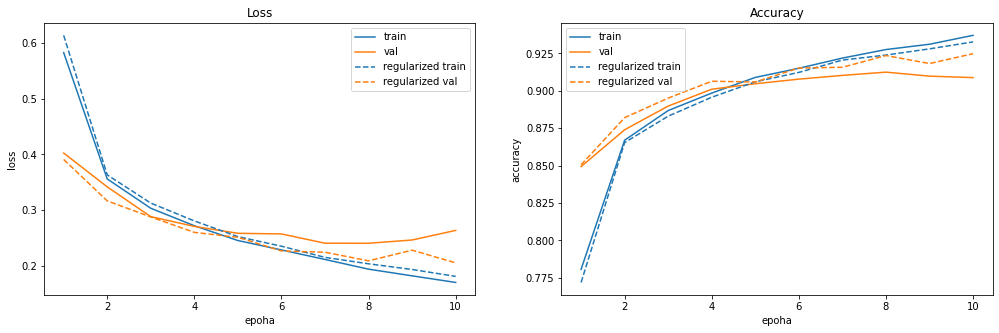

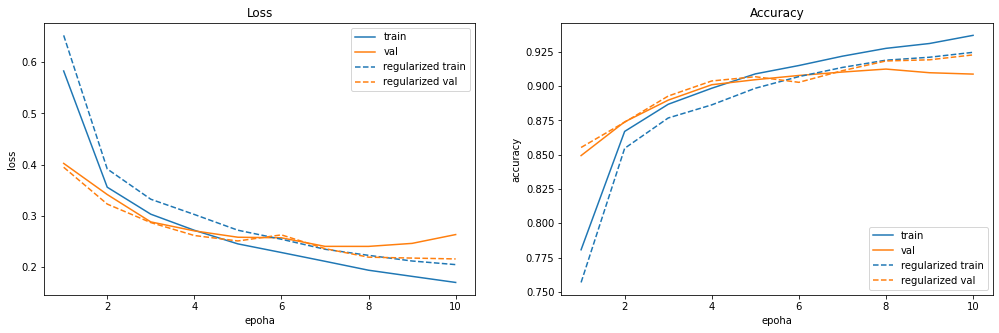

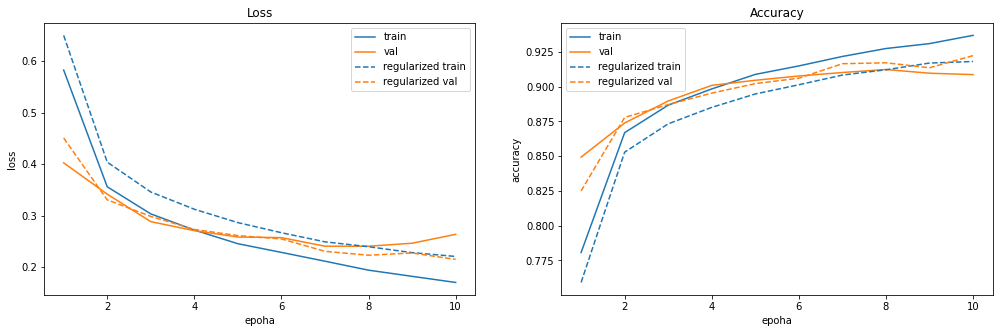

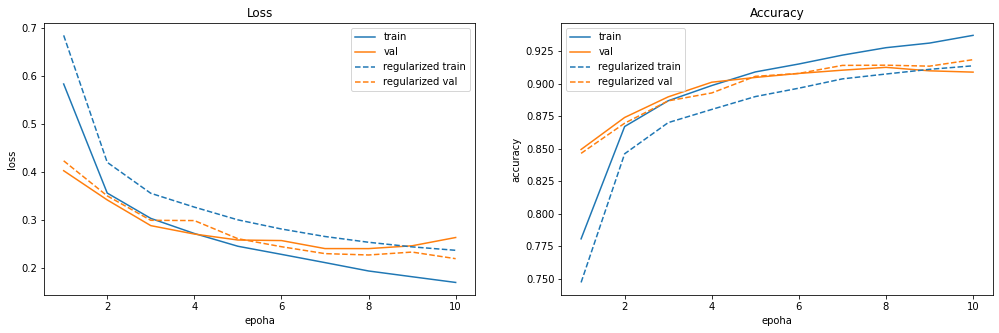

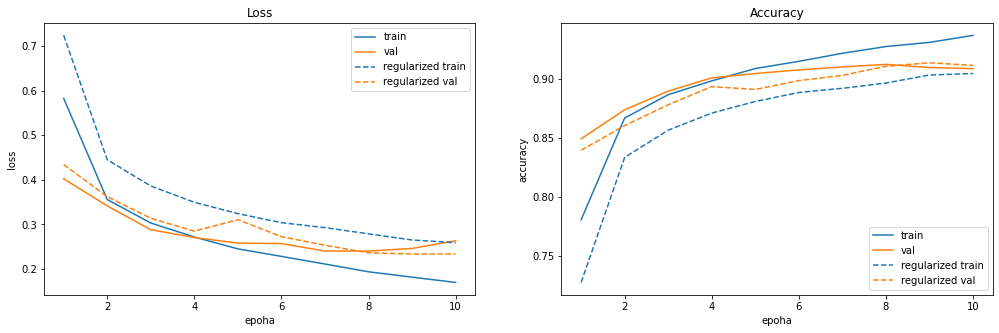

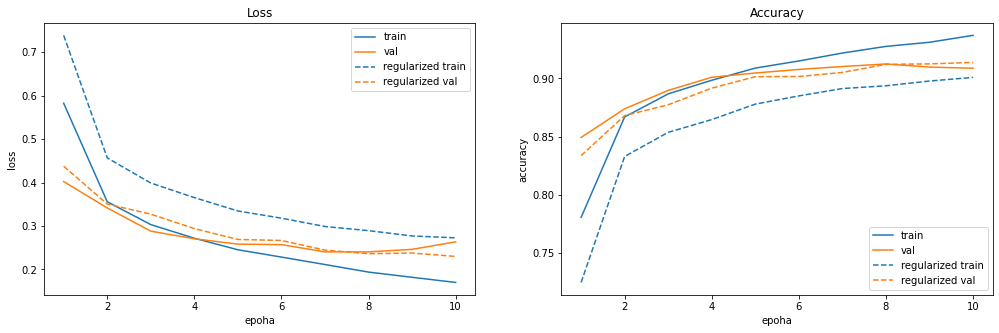

In [76]:
plot_history(baseline_hist, drop_1_hist)
plot_history(baseline_hist, drop_2_hist)
plot_history(baseline_hist, drop_3_hist)
plot_history(baseline_hist, drop_4_hist)
plot_history(baseline_hist, drop_5_hist)
plot_history(baseline_hist, drop_6_hist)

In [77]:
print_acc(model_drop_1)
print_acc(model_drop_2)
print_acc(model_drop_3)
print_acc(model_drop_4)
print_acc(model_drop_5)
print_acc(model_drop_6)

Accuracy (test data): 92.40 %
Accuracy (test data): 91.48 %
Accuracy (test data): 91.47 %
Accuracy (test data): 91.67 %
Accuracy (test data): 90.70 %
Accuracy (test data): 91.18 %


In [78]:
tocnosti_drop=[0]*6
tocnosti_drop[0]=accuracy_model(model_drop_1)*100
tocnosti_drop[1]=accuracy_model(model_drop_2)*100
tocnosti_drop[2]=accuracy_model(model_drop_3)*100
tocnosti_drop[3]=accuracy_model(model_drop_4)*100
tocnosti_drop[4]=accuracy_model(model_drop_5)*100
tocnosti_drop[5]=accuracy_model(model_drop_6)*100
print(tocnosti_drop)

[92.40000247955322, 91.47999882698059, 91.46999716758728, 91.6700005531311, 90.70000052452087, 91.18000268936157]


Graf koji prikazuje kako se mijenja točnost modela promjenom parametra drop rate.

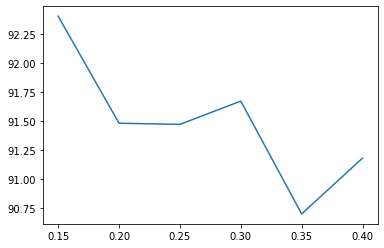

In [79]:
plt.plot(stope, tocnosti_drop)

Zaključak: vidimo da je najveća točnost za drop_rate=0.15

# Early stopping

Early stopping je jedna od najstarijih metoda regularizacije. Ova metoda koristi vrlo jednostavnu ideju: promatramo funkciju gubitka na skupu za validaciju i definiramo parametar "patience" kao neki prirodni broj. Ako nakon n=patience uzastopnih epoha nema poboljšanja funkcije gubitka na skupu za validaciju (tj. funkcija gubitka ne pada) n=patience uzastopnih epoha, prekidamo treniranje mreže.

Moguće je mijenjati broj epoha i na istoj mreži mijenjati taj parametar dok ne postignemo najbolju točnost, no takav pristup troši mnogo vremena i računalnih resursa.

Treba biti oprezan kod definiranja parametra "patience" jer premali paramatar može dovesti do underfittinga.

Problem s ovom tehnikom regularizacije je što mreža ne iskoristi sve primjere iz skupa za treniranje.

Učitavamo potrebne module.

In [80]:
from tensorflow.keras.callbacks import EarlyStopping

In [81]:
pat_1=2
pat_2=3
pat_3=4
pat_4=5
pat_5=7
pat_6=8


In [82]:
tocnosti_es=[0]*6

Definiramo 6 callbackova s različitim parametrom čekanje(patience).

In [83]:
callback_ES_1 = EarlyStopping(monitor='val_loss', patience=pat_1, restore_best_weights=True)
callback_ES_2 = EarlyStopping(monitor='val_loss', patience=pat_2, restore_best_weights=True)
callback_ES_3 = EarlyStopping(monitor='val_loss', patience=pat_3, restore_best_weights=True)
callback_ES_4 = EarlyStopping(monitor='val_loss', patience=pat_4, restore_best_weights=True)
callback_ES_5 = EarlyStopping(monitor='val_loss', patience=pat_5, restore_best_weights=True)
callback_ES_6 = EarlyStopping(monitor='val_loss', patience=pat_6, restore_best_weights=True)

model_ES = osnovni_model()

Treniramo modele.

In [84]:
hist_es_1 = model_ES.fit(X_train, y_train, epochs=BR_EPOHA, batch_size=BATCH_SIZE, validation_split=0.2, 
             callbacks=[callback_ES_1])
tocnosti_es[0]=accuracy_model(model_ES)

Epoch 1/10
750/750 [==============================] - 6s 8ms/step - loss: 0.5802 - accuracy: 0.7811 - val_loss: 0.4592 - val_accuracy: 0.8258
Epoch 2/10
750/750 [==============================] - 6s 7ms/step - loss: 0.3588 - accuracy: 0.8659 - val_loss: 0.3541 - val_accuracy: 0.8673
Epoch 3/10
750/750 [==============================] - 6s 7ms/step - loss: 0.3063 - accuracy: 0.8850 - val_loss: 0.3598 - val_accuracy: 0.8697
Epoch 4/10
750/750 [==============================] - 6s 7ms/step - loss: 0.2750 - accuracy: 0.8983 - val_loss: 0.2965 - val_accuracy: 0.8923
Epoch 5/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2505 - accuracy: 0.9059 - val_loss: 0.2688 - val_accuracy: 0.9015
Epoch 6/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2271 - accuracy: 0.9147 - val_loss: 0.2835 - val_accuracy: 0.8981
Epoch 7/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2141 - accuracy: 0.9201 - val_loss: 0.2589 - val_accuracy: 0.9054
Epoch 

In [85]:
hist_es_2 = model_ES.fit(X_train, y_train, epochs=BR_EPOHA, batch_size=BATCH_SIZE, validation_split=0.2, 
             callbacks=[callback_ES_2])
tocnosti_es[1]=accuracy_model(model_ES)

Epoch 1/10
750/750 [==============================] - 6s 7ms/step - loss: 0.1986 - accuracy: 0.9254 - val_loss: 0.2497 - val_accuracy: 0.9087
Epoch 2/10
750/750 [==============================] - 6s 7ms/step - loss: 0.1831 - accuracy: 0.9303 - val_loss: 0.2579 - val_accuracy: 0.9099
Epoch 3/10
750/750 [==============================] - 6s 8ms/step - loss: 0.1727 - accuracy: 0.9343 - val_loss: 0.2434 - val_accuracy: 0.9168
Epoch 4/10
750/750 [==============================] - 6s 7ms/step - loss: 0.1589 - accuracy: 0.9404 - val_loss: 0.2607 - val_accuracy: 0.9121
Epoch 5/10
750/750 [==============================] - 6s 7ms/step - loss: 0.1495 - accuracy: 0.9431 - val_loss: 0.2546 - val_accuracy: 0.9110
Epoch 6/10
750/750 [==============================] - 6s 7ms/step - loss: 0.1389 - accuracy: 0.9457 - val_loss: 0.2501 - val_accuracy: 0.9180


In [86]:
hist_es_3 = model_ES.fit(X_train, y_train, epochs=BR_EPOHA, batch_size=BATCH_SIZE, validation_split=0.2, 
             callbacks=[callback_ES_3])
tocnosti_es[2]=accuracy_model(model_ES)

Epoch 1/10
750/750 [==============================] - 6s 8ms/step - loss: 0.1566 - accuracy: 0.9408 - val_loss: 0.2499 - val_accuracy: 0.9181
Epoch 2/10
750/750 [==============================] - 6s 7ms/step - loss: 0.1472 - accuracy: 0.9447 - val_loss: 0.2481 - val_accuracy: 0.9141
Epoch 3/10
750/750 [==============================] - 6s 7ms/step - loss: 0.1351 - accuracy: 0.9492 - val_loss: 0.2542 - val_accuracy: 0.9180
Epoch 4/10
750/750 [==============================] - 6s 7ms/step - loss: 0.1314 - accuracy: 0.9496 - val_loss: 0.2468 - val_accuracy: 0.9125
Epoch 5/10
750/750 [==============================] - 6s 7ms/step - loss: 0.1193 - accuracy: 0.9553 - val_loss: 0.2727 - val_accuracy: 0.9147
Epoch 6/10
750/750 [==============================] - 6s 8ms/step - loss: 0.1078 - accuracy: 0.9595 - val_loss: 0.2879 - val_accuracy: 0.9095
Epoch 7/10
750/750 [==============================] - 6s 7ms/step - loss: 0.1073 - accuracy: 0.9588 - val_loss: 0.2756 - val_accuracy: 0.9140
Epoch 

In [87]:
hist_es_4 = model_ES.fit(X_train, y_train, epochs=BR_EPOHA, batch_size=BATCH_SIZE, validation_split=0.2, 
             callbacks=[callback_ES_4])
tocnosti_es[3]=accuracy_model(model_ES)

Epoch 1/10
750/750 [==============================] - 6s 8ms/step - loss: 0.1176 - accuracy: 0.9556 - val_loss: 0.2663 - val_accuracy: 0.9142
Epoch 2/10
750/750 [==============================] - 6s 7ms/step - loss: 0.1105 - accuracy: 0.9571 - val_loss: 0.2924 - val_accuracy: 0.9112
Epoch 3/10
750/750 [==============================] - 6s 7ms/step - loss: 0.1029 - accuracy: 0.9615 - val_loss: 0.2857 - val_accuracy: 0.9143
Epoch 4/10
750/750 [==============================] - 6s 7ms/step - loss: 0.0999 - accuracy: 0.9620 - val_loss: 0.2824 - val_accuracy: 0.9137
Epoch 5/10
750/750 [==============================] - 6s 7ms/step - loss: 0.0906 - accuracy: 0.9650 - val_loss: 0.3007 - val_accuracy: 0.9110
Epoch 6/10
750/750 [==============================] - 6s 7ms/step - loss: 0.0834 - accuracy: 0.9681 - val_loss: 0.3329 - val_accuracy: 0.9147


In [88]:
hist_es_5 = model_ES.fit(X_train, y_train, epochs=BR_EPOHA, batch_size=BATCH_SIZE, validation_split=0.2, 
             callbacks=[callback_ES_5])
tocnosti_es[4]=accuracy_model(model_ES)

Epoch 1/10
750/750 [==============================] - 6s 8ms/step - loss: 0.1068 - accuracy: 0.9594 - val_loss: 0.2778 - val_accuracy: 0.9139
Epoch 2/10
750/750 [==============================] - 6s 7ms/step - loss: 0.1009 - accuracy: 0.9608 - val_loss: 0.3151 - val_accuracy: 0.9062
Epoch 3/10
750/750 [==============================] - 6s 7ms/step - loss: 0.0958 - accuracy: 0.9627 - val_loss: 0.3070 - val_accuracy: 0.9143
Epoch 4/10
750/750 [==============================] - 6s 7ms/step - loss: 0.0860 - accuracy: 0.9666 - val_loss: 0.3263 - val_accuracy: 0.9159
Epoch 5/10
750/750 [==============================] - 6s 7ms/step - loss: 0.0887 - accuracy: 0.9661 - val_loss: 0.3186 - val_accuracy: 0.9149
Epoch 6/10
750/750 [==============================] - 6s 7ms/step - loss: 0.0818 - accuracy: 0.9690 - val_loss: 0.3369 - val_accuracy: 0.9116
Epoch 7/10
750/750 [==============================] - 6s 7ms/step - loss: 0.0741 - accuracy: 0.9722 - val_loss: 0.3264 - val_accuracy: 0.9173
Epoch 

In [89]:
hist_es_6 = model_ES.fit(X_train, y_train, epochs=BR_EPOHA, batch_size=BATCH_SIZE, validation_split=0.2, 
             callbacks=[callback_ES_6])
tocnosti_es[5]=accuracy_model(model_ES)

Epoch 1/10
750/750 [==============================] - 6s 8ms/step - loss: 0.0945 - accuracy: 0.9645 - val_loss: 0.2837 - val_accuracy: 0.9148
Epoch 2/10
750/750 [==============================] - 6s 7ms/step - loss: 0.0905 - accuracy: 0.9649 - val_loss: 0.2868 - val_accuracy: 0.9128
Epoch 3/10
750/750 [==============================] - 6s 7ms/step - loss: 0.0866 - accuracy: 0.9671 - val_loss: 0.2988 - val_accuracy: 0.9158
Epoch 4/10
750/750 [==============================] - 6s 7ms/step - loss: 0.0825 - accuracy: 0.9698 - val_loss: 0.3307 - val_accuracy: 0.9137
Epoch 5/10
750/750 [==============================] - 6s 7ms/step - loss: 0.0804 - accuracy: 0.9691 - val_loss: 0.3178 - val_accuracy: 0.9108
Epoch 6/10
750/750 [==============================] - 6s 7ms/step - loss: 0.0787 - accuracy: 0.9701 - val_loss: 0.3167 - val_accuracy: 0.9151
Epoch 7/10
750/750 [==============================] - 6s 8ms/step - loss: 0.0753 - accuracy: 0.9711 - val_loss: 0.3321 - val_accuracy: 0.9120
Epoch 

Crtamo krivulje gubitka i točnosti.

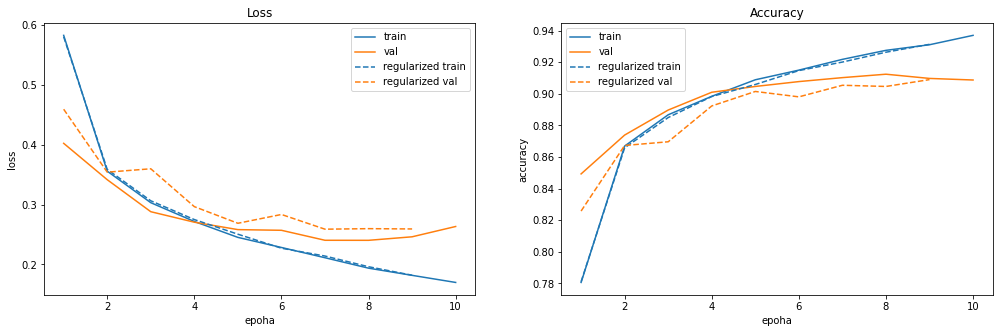

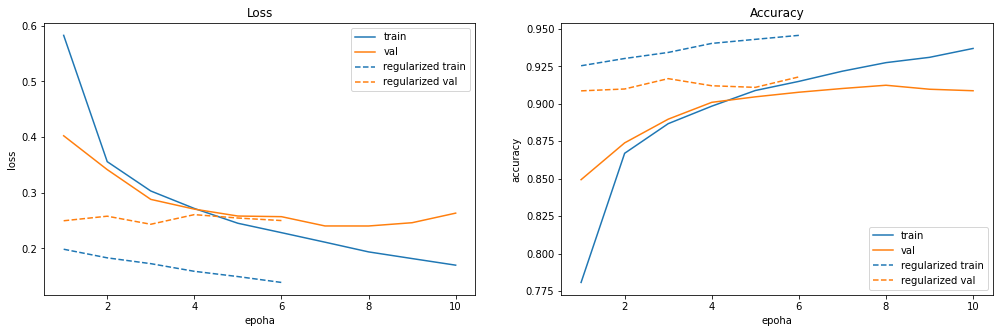

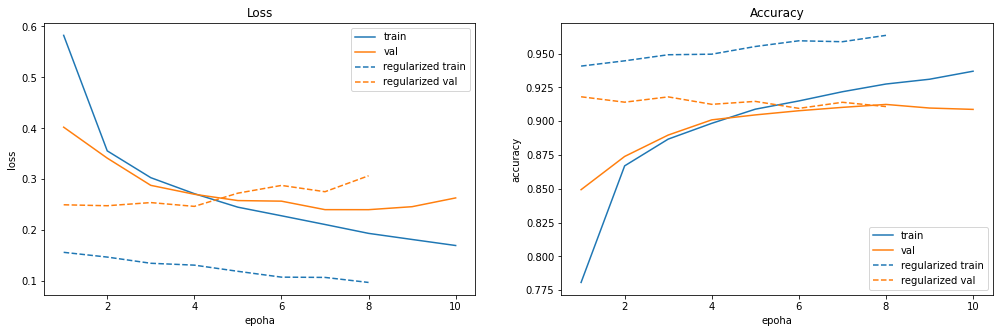

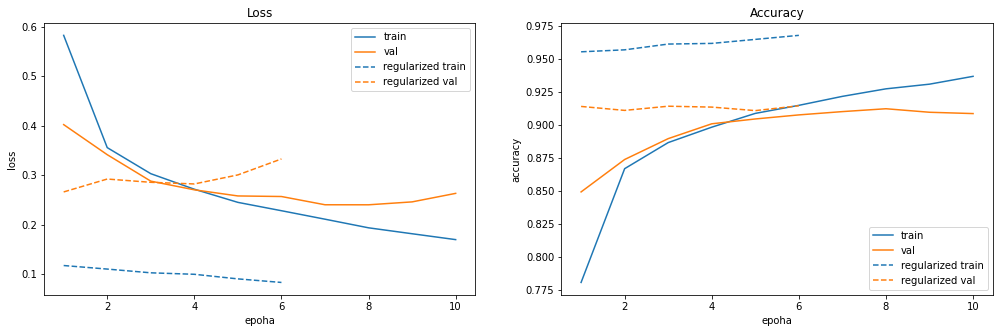

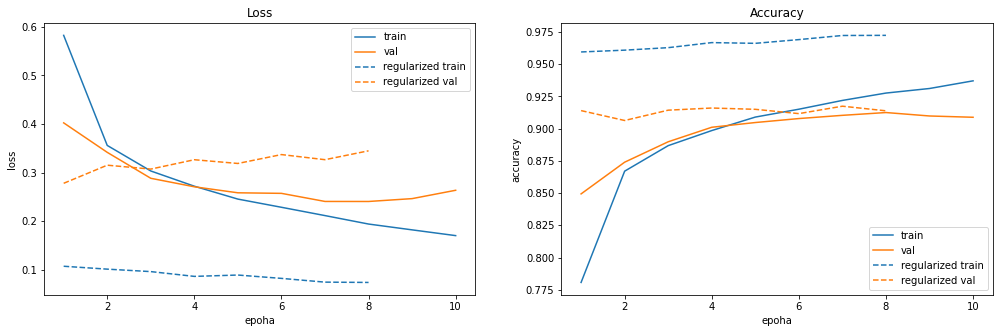

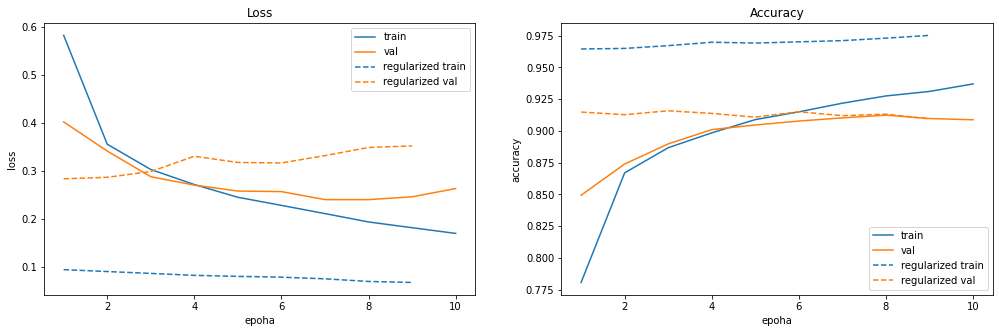

In [90]:
plot_history(baseline_hist, hist_es_1)
plot_history(baseline_hist, hist_es_2)
plot_history(baseline_hist, hist_es_3)
plot_history(baseline_hist, hist_es_4)
plot_history(baseline_hist, hist_es_5)
plot_history(baseline_hist, hist_es_6)

In [91]:
print_acc(model_ES)

Accuracy (test data): 91.60 %


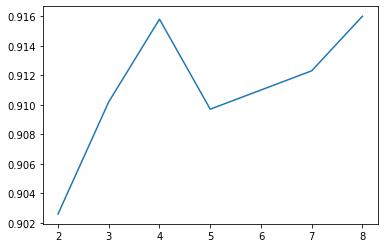

In [93]:
stope_es=[pat_1, pat_2, pat_3, pat_4, pat_5, pat_6]

plt.plot(stope_es, tocnosti_es)

Zaključak: Povećanjem parametra patience raste točnost na skupu za testiranje.

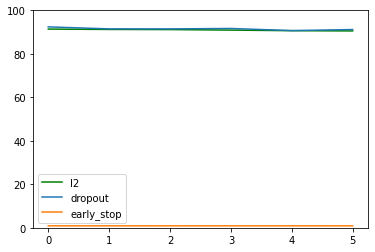

In [94]:
plt.plot(tocnosti_l2,"g", label="l2")
plt.plot(tocnosti_drop, label="dropout")
plt.plot(tocnosti_es, label="early_stop")
plt.ylim(ymax = 100, ymin = 0)
plt.legend()

#Reference:
1.https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

2.https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/l2-regularization

3.https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/

4.https://medium.com/analytics-vidhya/a-simple-introduction-to-dropout-regularization-with-code-5279489dda1e

5.https://www.geeksforgeeks.org/regularization-by-early-stopping/

6.https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/

--------------------------------------------------------------------------------
********************************************************************************
--------------------------------------------------------------------------------